In general we are trying to solve an overdetermined system of equations, $\text{A}\bf{x} = \bf{b}$.

 - Each row in the matrix $\text{A}$ is derived from ratios of redundant visiblities, such that the elements of $\text{A}$ are integers representing the antennas used in that ratio

 - the vector $\bf{b}$ contains the sum of the antenna cable delays for that visibility ratio

 - the solution $\bf{x}$ will provide the cable delay $\tau$ for each antenna

\begin{equation}
\begin{bmatrix} 
1 & -2 & 1 & 0 & 0 & 0 & 0 & \cdots& \cdots\\ 
1 & -1 & -1 & 1 & 0 & 0 & 0 & \cdots& \cdots\\ 
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \ddots& \cdots\\ 
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots& \ddots\\ 
\end{bmatrix}
\begin{bmatrix} 
\tau_1 \\ \tau_2 \\ \tau_3 \\ \tau_4 \\ \tau_5 \\ \vdots \\ \vdots \\ \vdots\\
\end{bmatrix} =
\begin{bmatrix} 
134\text{ns} \\ 78\text{ns} \\ \vdots \\ \vdots \\ \vdots \\ \vdots \\ \vdots \\ \vdots\\
\end{bmatrix} \rightarrow \text{A}\bf{x} = \bf{b}
\end{equation}

Each visibility ratio is proportional to a complex exponential
\begin{equation}
\frac{V_{i j}}{V_{k l}} \propto \exp{\bigg(-2\pi i \cdot(\tau_i - \tau_j - \tau_k + \tau_l)\bigg)}
\end{equation}

Where in the example the first and second rows of $\text{A}$ are made from these visibilities:
\begin{align}
\frac{V_{12}}{V_{23}} &\leadsto 1\tau_1 -2\tau_2  + 1\tau_3 \rightarrow A_1\\
\frac{V_{12}}{V_{34}} &\leadsto 1\tau_1 -1\tau_2  - 1\tau_3 + 1\tau_4 \rightarrow A_2\\
\end{align} 

***
Lets load some redundant baselines up and see if we can get the right answer by providing a perfect vector $\bf{b}$

In [1]:
import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '../data_creation/'))
import data_manipulation as dm

In [2]:
red_bls = dm._loadnpz('../data/testing_redundant_baselines_dict_80.npz')[()]

Find all the unique antennas for this data set

In [3]:
unique_ants = []
for key in red_bls.keys():
    for sep in red_bls[key]:
        for ant in sep:
            if ant not in unique_ants:
                unique_ants.append(ant)

In [4]:
print(unique_ants)

[1, 88, 37, 142, 138, 87, 137, 25, 123, 36, 140, 23, 54, 82, 121, 12, 11, 141, 14, 86, 40, 122, 27, 69, 85, 24, 66, 53, 67, 38, 83, 51, 70, 84, 13, 52, 65, 26, 68, 39, 71, 139, 124, 143, 55, 120, 41]


Assign each antenna a random delay in the range of -100ns to 100ns

In [5]:
import numpy as np
generated_ant_delays = {ant : np.random.uniform(low = -100, high = 100) for ant in unique_ants}

In [6]:
generated_ant_delays

{1: 62.665510808419384,
 11: -13.351097520018925,
 12: -1.3687426658619302,
 13: -99.65723997754927,
 14: 89.0871218371285,
 23: -39.36521154941626,
 24: -8.036995016469547,
 25: 39.69146242087987,
 26: -60.66377043823352,
 27: -42.36046830380074,
 36: -5.682914295763396,
 37: -17.4175922069237,
 38: -30.996340519003567,
 39: -18.629805190527634,
 40: 64.69550101598466,
 41: 87.68282810476998,
 51: 89.40839206265338,
 52: 43.14031458070468,
 53: 18.344321323435977,
 54: -47.77201058843046,
 55: 79.72386287304192,
 65: -42.94907135137214,
 66: 23.280581424966343,
 67: 34.15794025471129,
 68: -24.275162819510413,
 69: -82.59098808856322,
 70: -64.59296168301088,
 71: 8.597924984236997,
 82: -93.61647801052935,
 83: 14.823957321323306,
 84: 50.21009819904009,
 85: -64.5012715268092,
 86: -9.621114316211361,
 87: -17.917926422739967,
 88: -95.52399637416688,
 120: 87.79312313058958,
 121: -73.74146836802677,
 122: -4.562366145307678,
 123: 4.212119185366703,
 124: 4.5492342537305035,
 137:

Generate a list of abstracted visibility ratios from redundant baselines

In [7]:
import random
num_V_ratios = 100000
v_ratios = []
for i in range(num_V_ratios):
    
    # Randomly select a redundant baseline
    unique_baseline = random.sample(red_bls.keys(), 1)[0]
    
    # randomly select two sepearations from that baseline
    two_seps = [random.sample(red_bls[unique_baseline], 2)][0]
    
    v_ratios.append(two_seps)

In [8]:
v_ratios[:10]

[[(139, 142), (84, 87)],
 [(23, 137), (26, 140)],
 [(13, 54), (39, 86)],
 [(36, 140), (25, 123)],
 [(11, 138), (12, 139)],
 [(27, 122), (25, 120)],
 [(83, 138), (26, 69)],
 [(1, 13), (123, 143)],
 [(23, 140), (11, 121)],
 [(39, 142), (36, 139)]]

For one of these lets see what a row of A would look like

In [9]:
print(v_ratios[0])
flatten_list_o_tuples = lambda x: np.array(list(sum(x, ())))
a = flatten_list_o_tuples(two_seps)
b = np.zeros((a.size, np.max(unique_ants) + 1), dtype = int)

b[np.arange(a.size),a] = 1
b[1] *= -1
b[2] *= -1

b = np.sum(b, axis = 0)
b

[(139, 142), (84, 87)]


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1, -1,  0])

You can see that the approporiate antennas values have been assigned.

Lets generate the full matrix A

In [10]:
def get_A_row(two_seps, max_ant_idx):

    # how exactly does flatten_list_o_tuples work?
    # https://stackoverflow.com/a/10636583
    flatten_list_o_tuples = lambda x: np.array(list(sum(x, ())))

    a = flatten_list_o_tuples(two_seps)
    
    # construct the row
    # https://stackoverflow.com/a/29831596
    b = np.zeros((a.size, max_ant_idx), dtype = int)
    b[np.arange(a.size),a] = 1
    b[1] *= -1
    b[2] *= -1
    b = np.sum(b, axis = 0)
    
    return b

def make_A_from_list_o_sep_pairs(list_o_sep_pairs, max_ant_idx):
    
    A = []
    for two_seps in list_o_sep_pairs:
        
        A.append(get_A_row(two_seps, max_ant_idx = max_ant_idx))

    return np.asarray(A).reshape(-1, max_ant_idx)

In [11]:
A = make_A_from_list_o_sep_pairs(v_ratios, np.max(unique_ants) + 1)

In [12]:
A.shape

(100000, 144)

A is too large to print, so lets view it with imshow

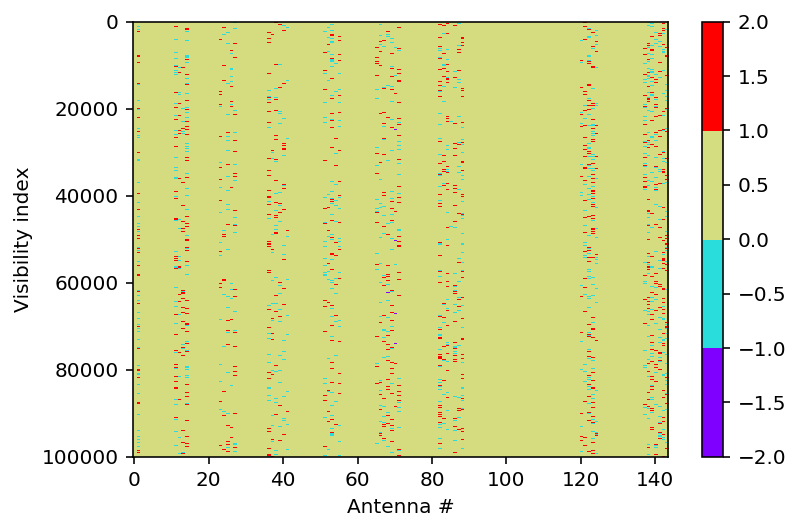

In [13]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.imshow(A, aspect = 'auto', cmap = plt.get_cmap('rainbow', 4))
plt.xlabel('Antenna #')
plt.ylabel('Visibility index')
plt.colorbar();

Every column is an antenna. There are many missing antennas, lets drop them and look again

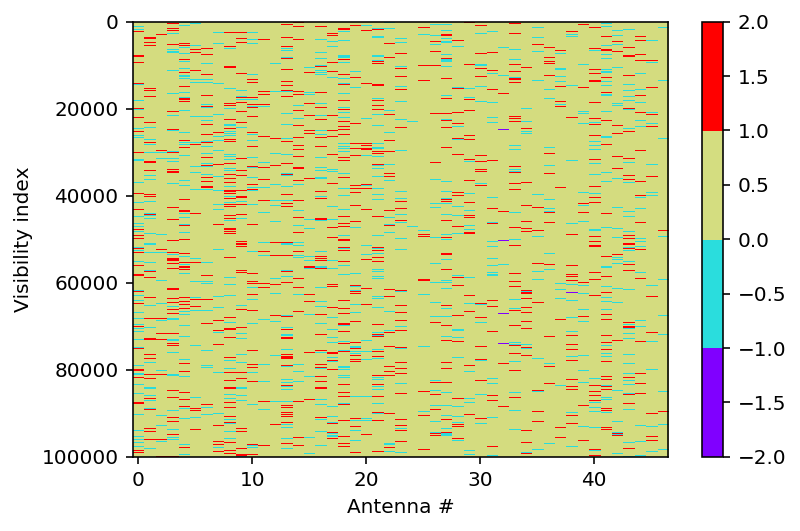

In [14]:
plt.imshow(A[:, unique_ants], aspect = 'auto', cmap = plt.get_cmap('rainbow', 4))
plt.xlabel('Antenna #')
plt.ylabel('Visibility index')
plt.colorbar();

Lets try to solve Ax = b. The dimensions dont work directly so we can use np.linalg.lstsq

First we need b

In [15]:
b = []
for v_ratio in v_ratios:
    
    ants = flatten_list_o_tuples(v_ratio)
    
    ratio_delay  = generated_ant_delays[ants[0]]
    ratio_delay -= generated_ant_delays[ants[1]]
    ratio_delay -= generated_ant_delays[ants[2]]
    ratio_delay += generated_ant_delays[ants[3]]
    
    b.append(ratio_delay)

Suppress scientific notation

In [16]:
np.set_printoptions(suppress=True)

Solve

In [17]:
ans = np.linalg.lstsq(A[:, unique_ants], b, rcond=0)
x = ans[0]
x

array([  45.33860931,  -81.16695072,    1.96935862,    6.10171804,
         48.66594262,    3.39641215,   -2.48853725,   39.88316956,
         43.04506639,   20.66132945,   66.08166508,  -25.25891858,
        -37.01898774,  -37.51567486,  -20.99393533,   -6.45769339,
        -11.48275533,  -21.09273923,   70.08358528,   18.65051717,
         63.21057309,   41.22787397,  -56.083347  ,  -59.60001446,
        -29.27234713,   -0.88799496,   67.1434338 ,   36.05463709,
         71.06349971,  -18.56668261,   63.96746755,  121.03329366,
        -48.55928097,   92.39631552, -111.70348362,   67.80792327,
          7.87107394,  -67.42935622,    5.67310372,  -13.1574402 ,
         17.67431278,   88.5255226 ,   36.42488854,  105.30543099,
         83.51959281,  147.49794908,   79.24060727])

Compare solution to true values

In [18]:
ant_solutions = {}
ant_errors = {}
for i, key in enumerate(sorted(generated_ant_delays.keys())):
    ant_solutions[key] = x[i]
    ant_errors[key] = generated_ant_delays[key] - ant_solutions[key]

In [19]:
x_true = [generated_ant_delays[key] for key in sorted(generated_ant_delays.keys())]

In [20]:
x_true

[62.665510808419384,
 -13.351097520018925,
 -1.3687426658619302,
 -99.65723997754927,
 89.0871218371285,
 -39.36521154941626,
 -8.036995016469547,
 39.69146242087987,
 -60.66377043823352,
 -42.36046830380074,
 -5.682914295763396,
 -17.4175922069237,
 -30.996340519003567,
 -18.629805190527634,
 64.69550101598466,
 87.68282810476998,
 89.40839206265338,
 43.14031458070468,
 18.344321323435977,
 -47.77201058843046,
 79.72386287304192,
 -42.94907135137214,
 23.280581424966343,
 34.15794025471129,
 -24.275162819510413,
 -82.59098808856322,
 -64.59296168301088,
 8.597924984236997,
 -93.61647801052935,
 14.823957321323306,
 50.21009819904009,
 -64.5012715268092,
 -9.621114316211361,
 -17.917926422739967,
 -95.52399637416688,
 87.79312313058958,
 -73.74146836802677,
 -4.562366145307678,
 4.212119185366703,
 4.5492342537305035,
 -88.34589980332896,
 -30.234127024996454,
 16.58274587935891,
 1.096181274061749,
 -79.12093012570374,
 -44.9691799377117,
 61.19182592689242]

In [21]:
errors = [ant_errors[key] for key in sorted(ant_errors.keys())]

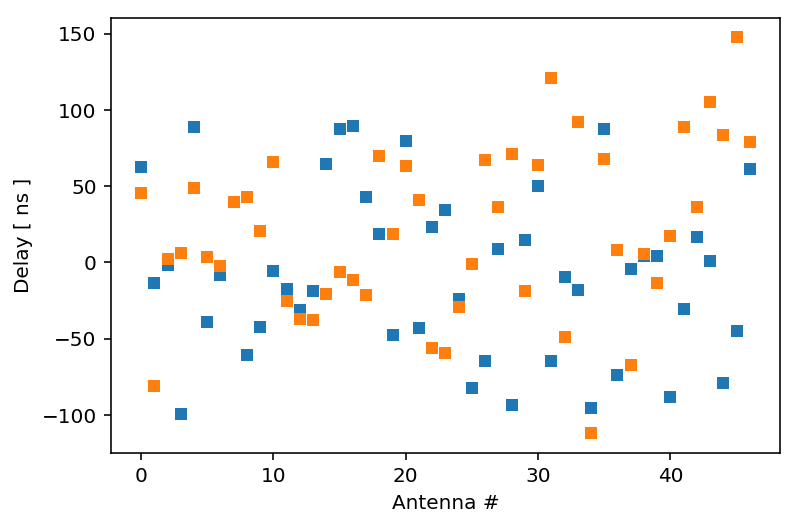

In [22]:
plt.plot(x_true, ls = 'none', marker = 's', markersize = 5)
plt.plot(x, ls = 'none', marker = 's', markersize = 5)
plt.xlabel('Antenna #')
plt.ylabel('Delay [ ns ]')
plt.show()

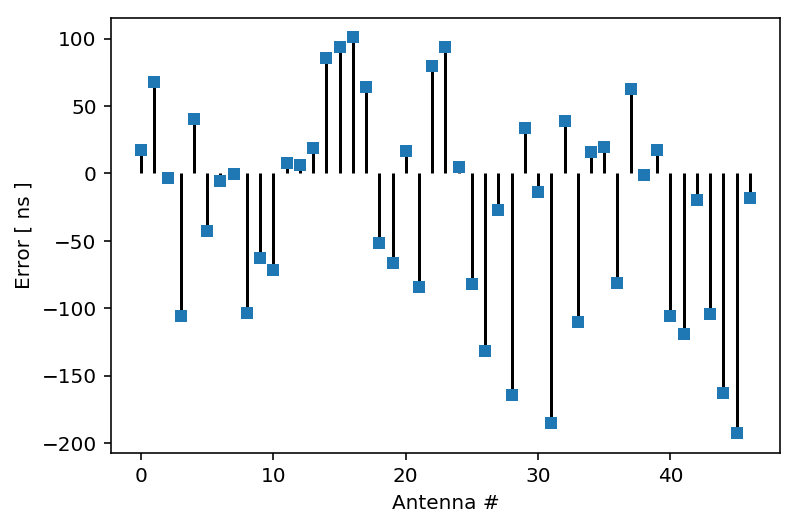

In [23]:
plt.plot(errors, ls = 'none', marker = 's', markersize = 5)
plt.vlines(range(len(errors)), 0, errors)
plt.xlabel('Antenna #')
plt.ylabel('Error [ ns ]')
plt.show()

Doesnt look great